In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/data_final.csv'

/content/drive/MyDrive/data_final.csv


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/data_final.csv'
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())


    Age Education_Level  Occupation  Number_of_Dependents Location  \
0  56.0        Master's  Technology                   5.0    Urban   
1  69.0     High School     Finance                   0.0    Urban   
2  46.0      Bachelor's  Technology                   1.0    Urban   
3  32.0     High School      Others                   2.0    Urban   
4  60.0      Bachelor's     Finance                   3.0    Urban   

   Work_Experience Marital_Status Employment_Status  Household_Size  \
0             21.0        Married         Full-time             7.0   
1              4.0         Single         Full-time             7.0   
2              1.0         Single         Full-time             7.0   
3             32.0        Married         Full-time             1.0   
4             15.0        Married     Self-employed             4.0   

  Homeownership_Status  ... Income_Growth_Rate Budget_Adjustments  \
0                  Own  ...               0.07               0.05   
1             

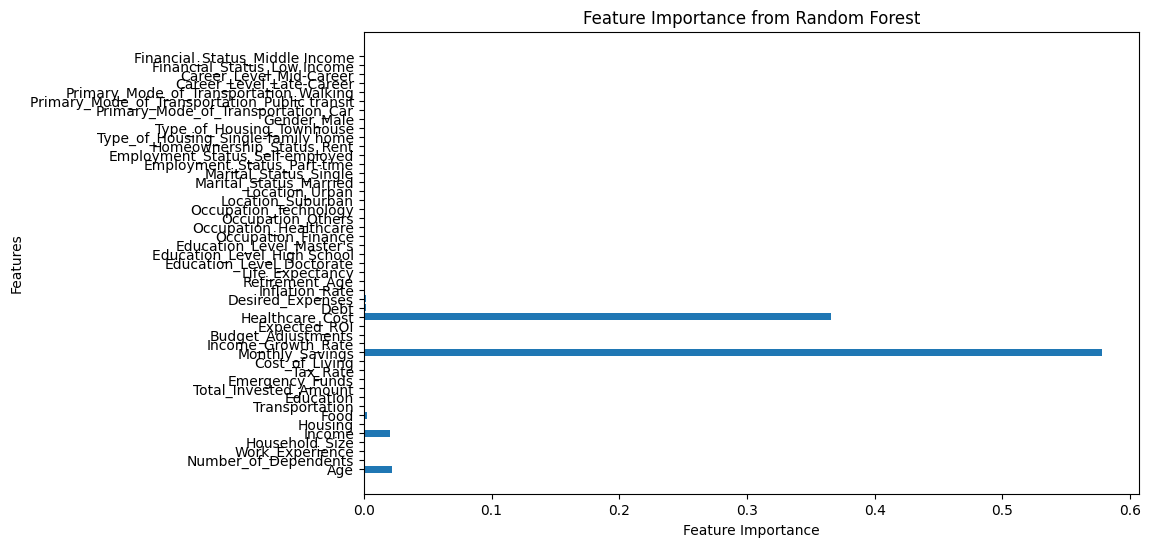

PCA Components:
[[ 1.11294046e-02  4.29149593e-03 -7.39434251e-03 -1.12974424e-03
   3.24494235e-01  6.28707516e-04  3.23059806e-01 -2.09758919e-02
  -2.37000527e-03  3.05397117e-01  3.17623338e-01  1.67006391e-01
   3.05630199e-01  3.07899291e-01  6.62169100e-03  7.12257330e-03
   3.08785487e-01  3.10008609e-01  2.91421310e-01  3.17949929e-01
  -5.65681127e-18  6.13074394e-03 -7.69902832e-03 -9.13983444e-03
   5.75786076e-03 -1.09593284e-03 -9.00864626e-03  4.61183532e-04
   2.67543505e-03  9.76012343e-05  8.58585642e-03 -1.67983860e-02
   6.99634320e-03 -5.89942689e-03  1.33995785e-02 -6.17890380e-03
   2.73071259e-02 -4.86392681e-03 -6.88265425e-03  1.61591558e-05
  -2.46241530e-03  5.53670080e-04 -1.51684905e-04 -6.38658189e-03
   8.02678457e-04  2.97495409e-03 -5.97701869e-03]
 [-9.77531420e-03  1.81928863e-02  5.39646485e-03  1.06259123e-02
   9.74837589e-04  1.87643309e-03  9.49352934e-04  5.43778917e-01
   3.82144568e-02  5.06949947e-04  2.28763896e-03 -2.96417522e-02
   9.2437

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.drop(columns=['Savings_Rate'])
y = df['Savings_Rate']
X = pd.get_dummies(X, drop_first=True)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Applying Random Forest for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()
print("PCA Components:")
print(pca.components_)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 30409022117.287426
R-squared: 0.8761641743205358


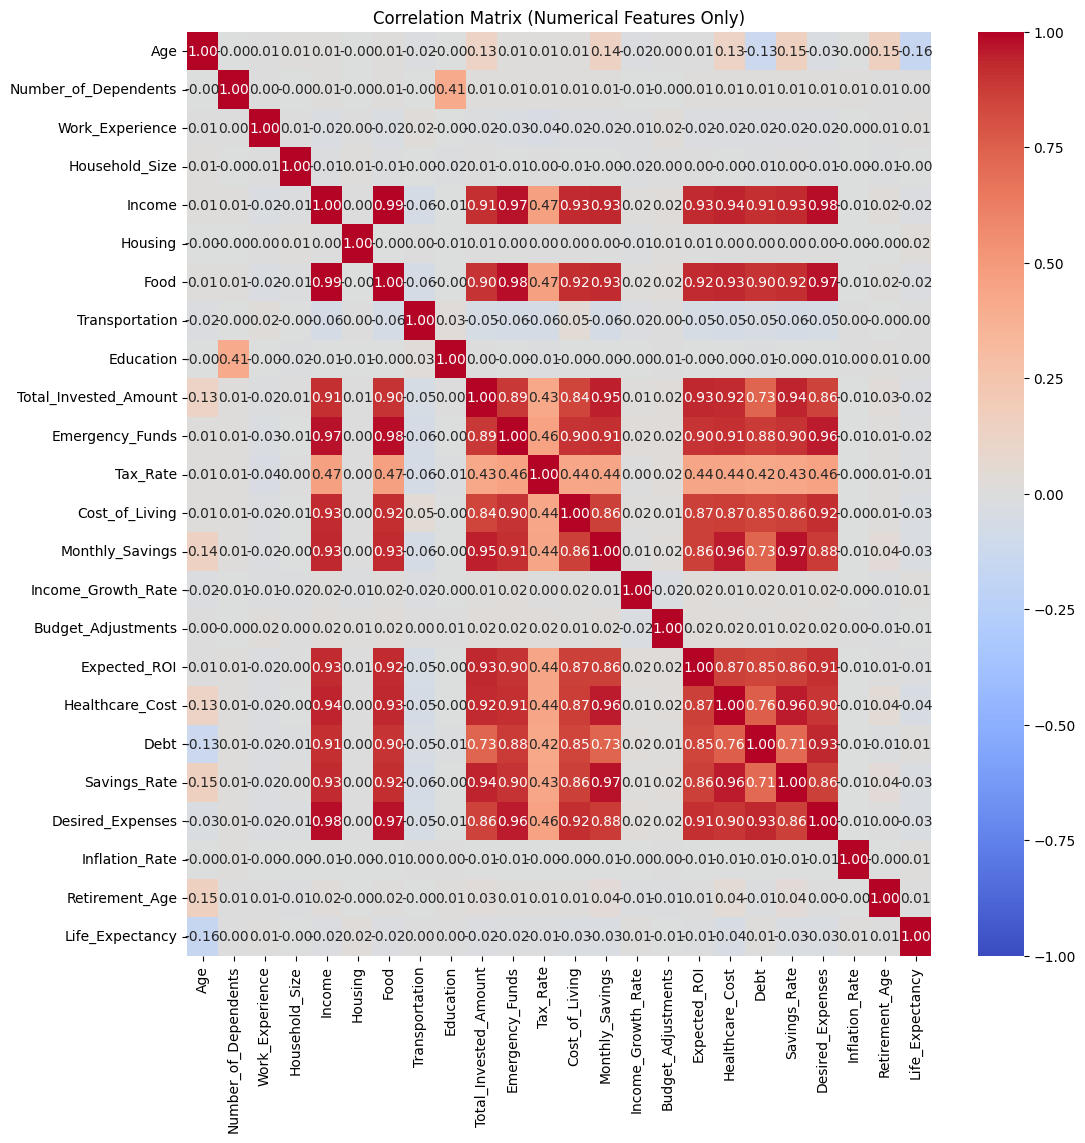

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

## Saving Rate Model

- Models used before include Linear Regression With feature extraction PCA : Mean Squared Error: 30409022117.287426 R-squared: 0.8761641743205358
- Linear Regression using Top 5 most correlated : Training Set Performance: Mean Squared Error (MSE): 11146691159.66 R²: 0.96
Testing Set Performance: Mean Squared Error (MSE): 11940228805.75 R²: 0.95
- The below XGBRegressor() achieves XGBoost Performance (Regression): Training Set MSE: 744117681.28 Training Set R²: 1.00 Testing Set MSE: 1414852622.96 Testing Set R²: 0.99 [Best Performance]

In [35]:
savings_rate_corr = correlation_matrix['Savings_Rate']
top_5_corr = savings_rate_corr.drop('Savings_Rate').sort_values(ascending=False).head(5)
print("Top 5 most correlated columns with 'savings_rate':")
print(top_5_corr)

Top 5 most correlated columns with 'savings_rate':
Monthly_Savings          0.971345
Healthcare_Cost          0.957237
Total_Invested_Amount    0.942491
Income                   0.926356
Food                     0.921087
Name: Savings_Rate, dtype: float64


In [36]:
top_5_features = top_5_corr.index.tolist()  # List of top 5 correlated features so can use it to train


In [37]:
X = numerical_df[top_5_features]
y = numerical_df['Savings_Rate']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("\nTesting Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")

Training Set Performance:
Mean Squared Error (MSE): 11146691159.66
R²: 0.96

Testing Set Performance:
Mean Squared Error (MSE): 11940228805.75
R²: 0.95


In [18]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.3 MB/s eta 0:00:00


In [20]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("XGBoost Performance (Regression):")
print(f"Training Set MSE: {train_mse_xgb:.2f}")
print(f"Training Set R²: {train_r2_xgb:.2f}")
print(f"Testing Set MSE: {test_mse_xgb:.2f}")
print(f"Testing Set R²: {test_r2_xgb:.2f}")

XGBoost Performance (Regression):
Training Set MSE: 744117681.28
Training Set R²: 1.00
Testing Set MSE: 1414852622.96
Testing Set R²: 0.99


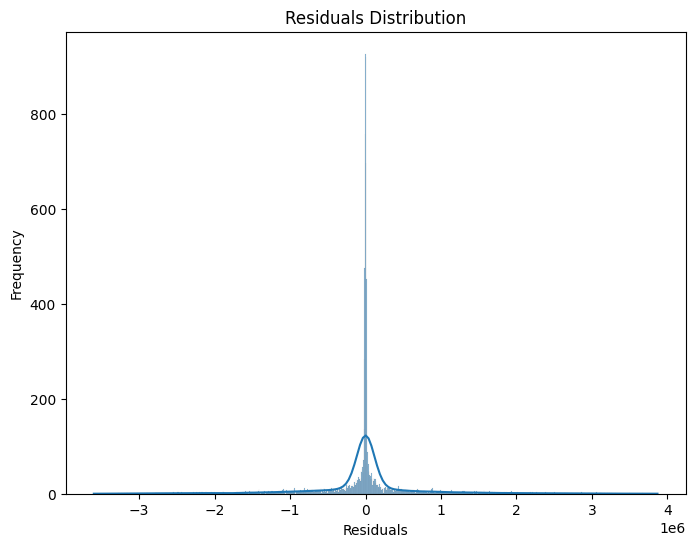

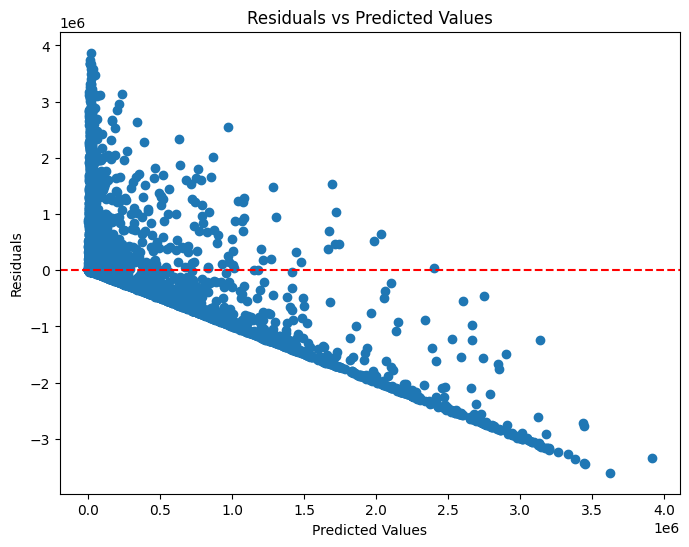

In [21]:
from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Plot residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

## Model Income Growth 

- Random Forest using feature extraction ( Best) ( Training Mean Squared Error (MSE): 0.00
Training R²: 0.99
Testing Mean Squared Error (MSE): 0.00
Testing R²: 0.96 )
-  Linear Regression ( Mean Squared Error (MSE): 91949439091.71
R²: 0.92)
- Decision Tree Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: 1.00
Testing Mean Squared Error (MSE): 0.00  ( btw this was 2 decimal places )
Testing R²: 0.86

- Extremely poor performance : Support Vector Regression Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: -0.02
Testing Mean Squared Error (MSE): 0.00
Testing R²: -0.02



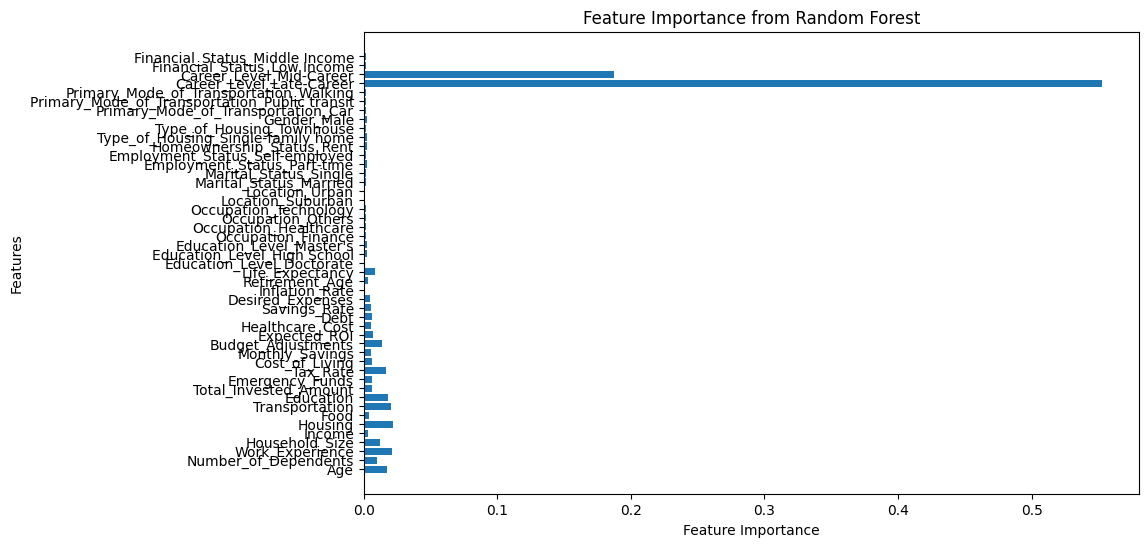

PCA Components:
[[ 1.45515955e-02  4.04677450e-03 -6.91850693e-03 -8.81946498e-04
   3.09944499e-01  5.29724754e-04  3.08535115e-01 -2.00219903e-02
  -2.17199961e-03  2.93902876e-01  3.03215254e-01  1.58211682e-01
   2.91570279e-01  2.96949234e-01  6.72796091e-03  2.94499427e-01
   2.98334145e-01  2.74727657e-01  2.95281481e-01  3.02339498e-01
  -5.39677811e-18  6.51073518e-03 -7.74403178e-03 -8.48918067e-03
   5.35929872e-03 -9.78161376e-04 -8.62118719e-03  3.83726572e-04
   2.51189198e-03  1.84795178e-04  8.33873708e-03 -1.59693838e-02
   6.65616974e-03 -5.62135553e-03  1.26991822e-02 -5.88038879e-03
   2.54024363e-02 -4.44649794e-03 -6.54381302e-03 -1.04856567e-05
  -2.21478854e-03  5.88318193e-04 -1.30229599e-04 -5.49440173e-03
   7.51314645e-04  2.66462518e-03 -5.49215070e-03]
 [-1.01850986e-02  1.81878012e-02  5.12739038e-03  1.03800790e-02
   1.09088589e-03  1.69445040e-03  1.07126726e-03  5.43775263e-01
   3.81944281e-02  4.92351942e-04  2.41377228e-03 -2.96169710e-02
   9.2582

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = df.drop(columns=['Income_Growth_Rate'])  # All columns except target
y = df['Income_Growth_Rate']  # Target column
X = pd.get_dummies(X, drop_first=True)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=8)  # Taking 8 as lots of low correlated data , can test with 5 also
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#using RandomForest to predict Income_growth_Rate
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()
print("PCA Components:")
print(pca.components_)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [28]:
ROI_rate_corr = correlation_matrix['Expected_ROI']
top_5_corr = ROI_rate_corr.drop('Expected_ROI').sort_values(ascending=False).head(5)
print("Top 5 most correlated columns with 'savings_rate':")
print(top_5_corr)

Top 5 most correlated columns with 'savings_rate':
Total_Invested_Amount    0.934157
Income                   0.928178
Food                     0.922596
Desired_Expenses         0.911884
Emergency_Funds          0.899733
Name: Expected_ROI, dtype: float64


In [29]:
top_5_features = top_5_corr.index.tolist()
X = numerical_df[top_5_features]
y = numerical_df['Expected_ROI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("Testing Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")

Training Set Performance:
Mean Squared Error (MSE): 91949439091.71
R²: 0.92
Testing Set Performance:
Mean Squared Error (MSE): 98243501071.58
R²: 0.91


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Selecting top 5 features based on correlation
top_5_features = top_5_corr.index.tolist()
X = numerical_df[top_5_features]
y = numerical_df['Expected_ROI']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("\nTesting Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")


Training Set Performance:
Mean Squared Error (MSE): 28486879120.51
R²: 0.98

Testing Set Performance:
Mean Squared Error (MSE): 35473084428.55
R²: 0.97


trying normalise

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Selecting top 5 features based on correlation
top_5_features = top_5_corr.index.tolist()
X = numerical_df[top_5_features]
y = numerical_df['Expected_ROI']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Set Performance:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R²: {train_r2:.2f}")
print("\nTesting Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R²: {test_r2:.2f}")


Training Set Performance:
Mean Squared Error (MSE): 28439579710.30
R²: 0.98

Testing Set Performance:
Mean Squared Error (MSE): 35647859212.61
R²: 0.97


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Initialize a dictionary to store results
results = {}

# Loop over the models, fit them, and evaluate
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Fit model
    y_train_pred = model.predict(X_train_scaled)  # Train predictions
    y_test_pred = model.predict(X_test_scaled)  # Test predictions

    # Evaluate performance
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results in dictionary
    results[model_name] = {
        "Train MSE": train_mse,
        "Train R²": train_r2,
        "Test MSE": test_mse,
        "Test R²": test_r2
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name} Performance:")
    print(f"Training Mean Squared Error (MSE): {result['Train MSE']:.2f}")
    print(f"Training R²: {result['Train R²']:.2f}")
    print(f"Testing Mean Squared Error (MSE): {result['Test MSE']:.2f}")
    print(f"Testing R²: {result['Test R²']:.2f}")
    print("\n")


Linear Regression Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: 0.74
Testing Mean Squared Error (MSE): 0.00
Testing R²: 0.74


Random Forest Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: 0.99
Testing Mean Squared Error (MSE): 0.00
Testing R²: 0.96


Support Vector Regression Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: -0.02
Testing Mean Squared Error (MSE): 0.00
Testing R²: -0.02


Decision Tree Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: 1.00
Testing Mean Squared Error (MSE): 0.00
Testing R²: 0.93


K-Nearest Neighbors Performance:
Training Mean Squared Error (MSE): 0.00
Training R²: 0.94
Testing Mean Squared Error (MSE): 0.00
Testing R²: 0.86


